<a href="https://colab.research.google.com/github/Suryaanugrah2001/RandomforestPolusi/blob/main/Polusi_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')


In [48]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
from google.colab import files

data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/polusijakarta.csv")
data = pd.DataFrame(data)
data

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-02-01,73,126,38,26,46,34,126,PM25,TIDAK SEHAT,DKI5
1,2021-02-02,53,70,40,14,55,25,70,PM25,SEDANG,DKI3
2,2021-02-03,32,53,40,11,42,19,53,PM25,SEDANG,DKI3
3,2021-02-04,36,59,40,14,47,24,59,PM25,SEDANG,DKI5
4,2021-02-05,29,51,40,14,45,35,51,PM25,SEDANG,DKI3
5,2021-02-06,34,53,40,8,57,15,57,O3,SEDANG,DKI2
6,2021-02-07,33,55,40,10,57,13,57,O3,SEDANG,DKI2
7,2021-02-08,26,44,39,10,54,17,54,O3,SEDANG,DKI2
8,2021-02-09,33,57,40,13,47,22,57,PM25,SEDANG,DKI4
9,2021-02-10,50,64,40,13,49,16,64,PM25,SEDANG,DKI3


In [50]:
# Tampilkan beberapa data pertama
print(data.head())

      tanggal  pm10  pm25  so2  co  o3  no2  max critical     categori  \
0  2021-02-01    73   126   38  26  46   34  126     PM25  TIDAK SEHAT   
1  2021-02-02    53    70   40  14  55   25   70     PM25       SEDANG   
2  2021-02-03    32    53   40  11  42   19   53     PM25       SEDANG   
3  2021-02-04    36    59   40  14  47   24   59     PM25       SEDANG   
4  2021-02-05    29    51   40  14  45   35   51     PM25       SEDANG   

  location  
0     DKI5  
1     DKI3  
2     DKI3  
3     DKI5  
4     DKI3  


In [51]:
# Pisahkan variabel independen dan target
X = data[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']]
y = data['categori']

# Konversi data kategori menjadi numerik (misalnya, 0 untuk "SEDANG" dan 1 untuk "TIDAK SEHAT")
y = y.map({'SEDANG': 0, 'TIDAK SEHAT': 1})


In [52]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Buat model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [54]:
# Prediksi kategori polusi pada data pengujian
y_pred = rf_classifier.predict(X_test)

# Tampilkan metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tampilkan matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Confusion Matrix:
[[4 0]
 [1 1]]


**Classification Report:**

Precision: Merupakan tingkat ketepatan model dalam mengklasifikasikan setiap kategori. Precision untuk kategori 0 adalah 0.80, yang berarti 80% dari yang diprediksi sebagai kategori 0 adalah benar. Precision untuk kategori 1 adalah 1.00, yang berarti 100% dari yang diprediksi sebagai kategori 1 adalah benar.

Recall: Merupakan tingkat keberhasilan model dalam menemukan semua instance dari kategori yang benar. Recall untuk kategori 0 adalah 1.00, yang berarti model berhasil menemukan semua instance dari kategori 0. Recall untuk kategori 1 adalah 0.50, yang berarti model hanya berhasil menemukan setengah instance dari kategori 1.

F1-score: Merupakan perpaduan antara precision dan recall. F1-score untuk kategori 0 adalah 0.89, dan untuk kategori 1 adalah 0.67.

Support: Jumlah instance yang termasuk dalam setiap kategori. Ada 4 instance dengan kategori 0 dan 2 instance dengan kategori 1.

Accuracy: Merupakan tingkat keberhasilan model dalam mengklasifikasikan seluruh dataset. Akurasi adalah 0.83, yang berarti model berhasil mengklasifikasikan 83% dari seluruh dataset.





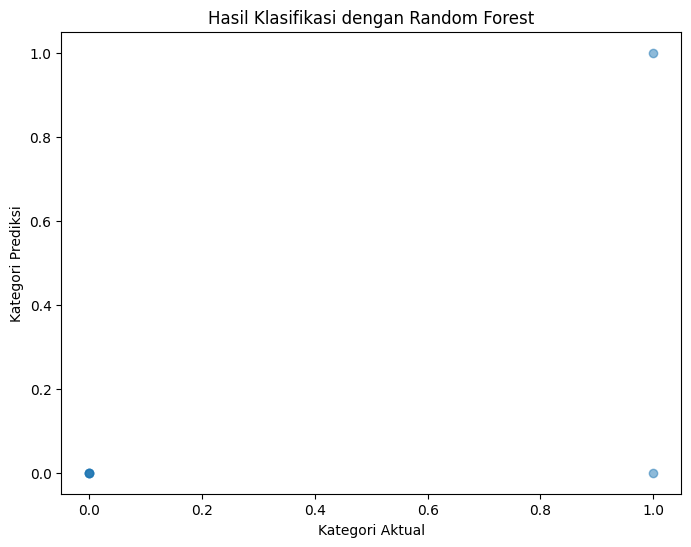

In [55]:
# Plot kategori aktual dan hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Kategori Aktual")
plt.ylabel("Kategori Prediksi")
plt.title("Hasil Klasifikasi dengan Random Forest")
plt.show()
